In [1]:
def f(x):
    return x**2 - 1

In [2]:
def fp(x):
    return 2*x

In [8]:
import numpy as np

In [21]:
x = np.linspace(-5-5j, 5+5j, 10)
for i in range(10):
    x = x - f(x)/fp(x)
    

In [24]:
def f1(x):
    return 3*x**3+x**2+2*x+1

def f1p(x):
    return 9*x**2 + 2*x + 2 

In [30]:
x = np.linspace(-5-5j, 5+5j, 100)
for i in range(1000):
    x = x - f1(x)/f1p(x)
    

In [31]:
set(x)

{(-0.45986326943593103+0j),
 (0.06326496805129887-0.8490292577890322j),
 (0.06326496805129887+0.8490292577890322j),
 (0.0632649680512989+0.8490292577890322j)}

In [23]:
np.roots([3, 1, 2, 1])

array([ 0.06326497+0.84902926j,  0.06326497-0.84902926j,
       -0.45986327+0.j        ])

# Newton Fractals

In [50]:
import matplotlib.pyplot as plt

In [191]:
COLORS = np.array([[142/255, 1.0, 0.0], [97/255, 0.0, 1.0],
                  [1.0, 0.0, 89.0/255], [1.0, 220/255, 0.0],[222/255., 1.0, 0.0],
                  [22/255., 33.0/255., 0.0], [82/255., 13.0/255., 0.0], [2/255., 93.0/255., 0.0]])

In [194]:
x, y = np.meshgrid([1,2,3,4], [1,2,3,4])

In [196]:
def f(x):
    return x**3 - 1

def fp(x):
    return 3*(x**2)

In [200]:
root1 ,root2, root3 = np.roots([1, 0,0,-1])

In [217]:
res = 600
X = np.linspace(-2,2,res)
Y = np.linspace(-2,2,res)

In [218]:
x, y = np.meshgrid(X, Y)

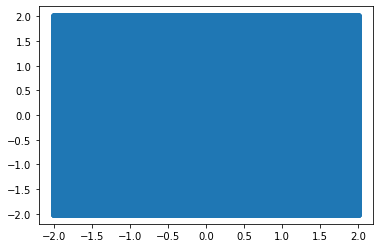

In [219]:
plt.scatter(x,y)

In [220]:
Z = x + 1j*y

In [221]:
for i in range(100):
    Z =  Z - f(Z)/fp(Z)

In [222]:
eps = 0.001
Z1 = abs(Z - root1) < eps
Z2 = abs(Z - root2) < eps
Z3 = abs(Z - root3) < eps

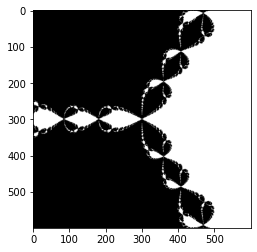

In [223]:
plt.imshow(Z3, cmap="gray")

In [224]:
arr = np.zeros(shape=(res, res, 3))
for i in range(res):
    for j in range(res):
        if Z1[i][j] == True:
            arr[i][j] = COLORS[0]
        
        if Z2[i][j] == True:
            arr[i][j] = COLORS[1]
            
        if Z3[i][j] == True:
            arr[i][j] = COLORS[2]

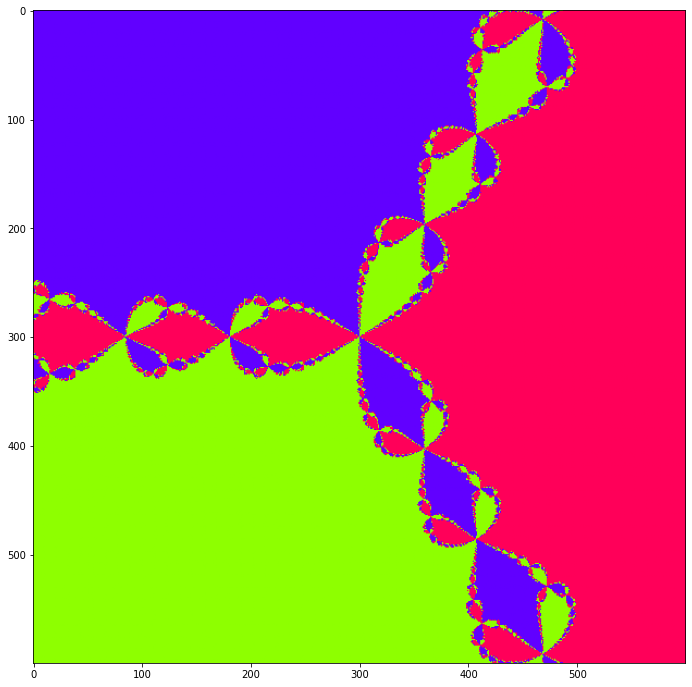

In [226]:
plt.figure(figsize=(12,12))
plt.imshow(arr)

# LEts not be Monke

In [234]:
p = np.poly1d([1,0,1,0,1,0,-1])

In [235]:
p.deriv()(0.23)

0.5125298058

In [240]:
xmin = -2
xmax = 2
ymin = -2
ymax = 2
nx = 650
ny = 650
X = np.linspace(xmin, xmax, nx)
Y = np.linspace(ymin, ymax, ny)
X,Y=np.meshgrid(X,Y)

Z = X + 1j*Y
for i in range(50):
    Z = Z - p(Z)/p.deriv()(Z)

In [241]:
eps = 0.001
Z_T = []
for r in p.roots:
    Z_T.append(abs(Z-r) < eps)


In [242]:
# Z_T = []
colored_arr = np.zeros(shape=(nx, ny, 3))

for i in range(nx):
        for j in range(ny):
            for k, z_t in enumerate(Z_T):
                if z_t[i][j]:
                    colored_arr[i][j] = COLORS[k]

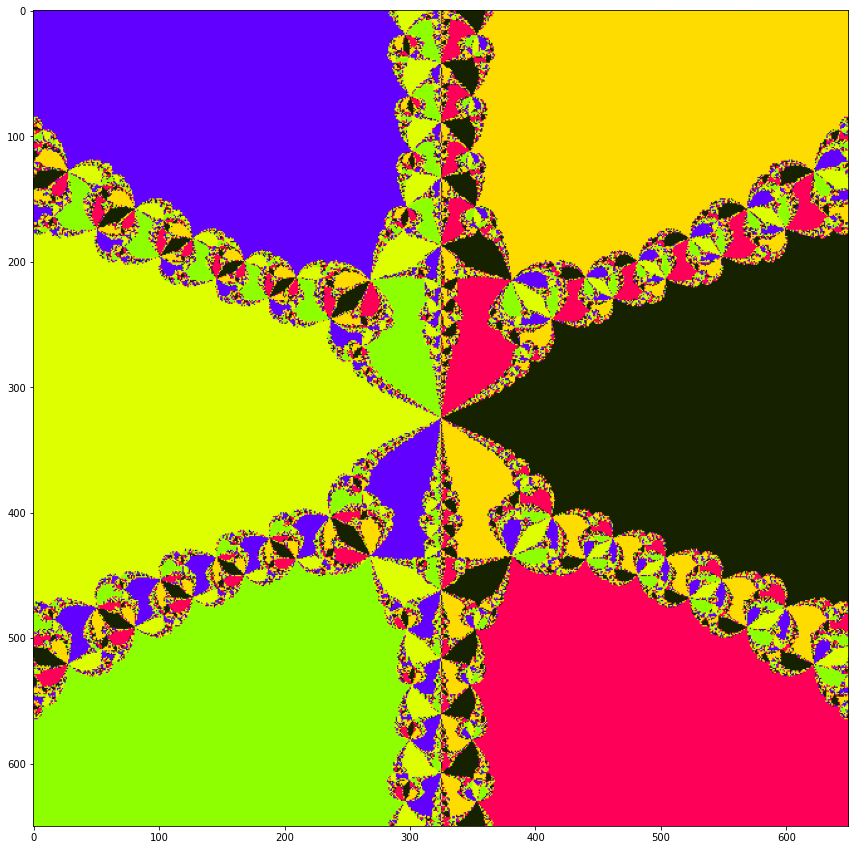

In [243]:
plt.figure(figsize=(15,15))
plt.imshow(colored_arr)